# Central Limit Theorem

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

#### Simulate the central limit theorem starting from a population that follows a distribution:

1. Poisson, where $\lambda=3$
2. Uniform, with values between 5 and 100
3. Sample size = 1000

Steps:

- Determine the mean $\mu$ and the mean square deviation of the population $\sigma$
- Represent graphically the distribution of the population and a random sample of the population
- Extract random samples of size $n$ from the population
- Calculate the average for each sample
- Represent the distribution of averages calculated in the previous point
- Calculate the average of the averages from point 4. and compare with the population average.
- Calculate the mean square deviation of the averages from point 4. Compare with $\sigma/\sqrt(n)$
- Represent the value of the averages from point 6. as a function of $n$, $n=10.20,...,1000$

#### 1. 

In [55]:
# Lambda in this case is mu

mu=3
sigma=np.sqrt(mu)
sigma

1.7320508075688772

In [56]:
poisson.std(mu=mu)

1.7320508075688772

#### 2. 

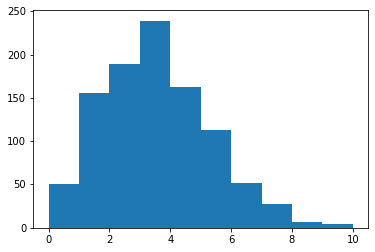

In [57]:
# Generating random values of 1000

x=poisson.rvs(mu=mu, size=1000)
plt.hist(x)
plt.show()

#### 3.

In [58]:
nrSamples=100000
n=1000

samples=poisson.rvs(mu=mu, size=(nrSamples, n))
samples

array([[2, 4, 5, ..., 0, 4, 3],
       [3, 3, 3, ..., 2, 6, 3],
       [3, 4, 4, ..., 3, 5, 5],
       ...,
       [0, 5, 4, ..., 0, 4, 2],
       [3, 1, 3, ..., 4, 5, 3],
       [5, 6, 1, ..., 2, 3, 4]])

#### 4.

In [59]:
avgSamples=np.mean(samples, axis=1)
avgSamples

array([3.045, 3.024, 2.998, ..., 2.958, 3.048, 3.065])

#### 5.

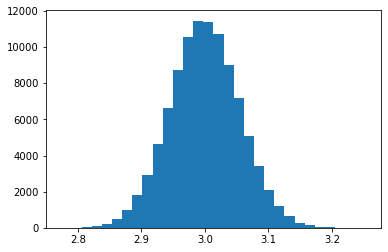

In [60]:
plt.hist(avgSamples, bins=30)
plt.show()

#### 6.

In [61]:
avgAverages=np.mean(avgSamples)
print(avgAverages, mu)

2.99992695 3


#### 7.

In [62]:
sigmaMean=np.std(avgSamples, ddof=1)
print(sigmaMean, sigma/np.sqrt(n))

0.054802802913442035 0.054772255750516606


#### 8.

In [63]:
n=np.arange(10, 1000, 10)
nrSamples=1000

def avgPoisson(n, nrSamples, mu):
    for n in n:
        samples=poisson.rvs(mu=mu, size=(nrSamples, n))
        avgSamples=np.mean(samples, axis=1)
        avgTotal=np.mean(avgSamples)
        yield avgTotal

In [64]:
avg=list(avgPoisson(n, nrSamples, mu))

Text(0.5, 1.0, '1000 samples')

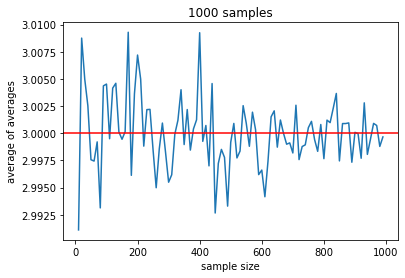

In [65]:
plt.plot(n, avg)
plt.axhline(y=mu, color='r')
plt.xlabel('sample size')
plt.ylabel('average of averages')
plt.title(f'{nrSamples} samples')